<a href="https://colab.research.google.com/github/fxrdhan/Tubes_AI_Kelompok-1_Bike-Sharing-Demand-Predictor/blob/main/UCI_Bike_Sharing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediksi Permintaan Sepeda Harian Menggunakan Regresi Linear Berganda**

**Dataset:** UCI Bike Sharing Dataset (level harian)

**Sumber Dataset:** https://archive.ics.uci.edu/dataset/275/bike+sharing+dataset

**Keterangan Pengerjaan**
- Kelompok: 1
- Anggota: Firdaus Arif Ramadhani (101032300131), Muhammad Fakhri Arrasyid (101032300150), Yoga Reswara (101032300119)
- Kelas: TK-47-04
- Dosen Pengampu: Dr. Budhi Irawan, S.Si., M.T
- Tahun Akademik: 2024/2025 (Semester 5)

## **BAB I — PENDAHULUAN**

### **1.1 Latar Belakang**

Sistem bike sharing adalah layanan peminjaman sepeda yang memungkinkan pengguna mengambil sepeda di satu stasiun/titik parkir dan mengembalikannya di stasiun lain, sehingga mendukung perjalanan satu arah dan mendorong mobilitas yang lebih berkelanjutan ​[1]​. Seiring meningkatnya adopsi di kawasan perkotaan, konsep mikro mobilitas serupa juga diterapkan di lingkungan kampus; misalnya Telkom University menghadirkan layanan Beam untuk mobilitas internal kampus dan menekankan dukungan terhadap kebijakan zero emission sebagai bagian dari upaya mewujudkan kampus hijau ​[2]​ .

Dalam operasionalnya, tantangan utama bike sharing adalah ketidakseimbangan distribusi sepeda antar stasiun akibat variasi permintaan ruang-waktu, sehingga diperlukan kegiatan redistribusi agar ketersediaan sepeda tetap selaras dengan kebutuhan pengguna ​[3]​. Untuk mendukung keputusan redistribusi yang lebih efektif, proyek ini membangun model prediksi permintaan menggunakan Regresi Linear Berganda karena modelnya relatif mudah diinterpretasikan melalui koefisien yang menggambarkan perubahan respons terhadap perubahan prediktor​[4], [5]​. Studi kasus menggunakan dataset Bike Sharing dari UCI Machine Learning Repository yang berisi data historis peminjaman sepeda harian beserta atribut terkait kondisi cuaca, musim, dan faktor kalender selama periode tahun 2011 hingga 2012 ​[6]​.

### **1.2 Rumusan Masalah**

1. Faktor-faktor apa saja yang mempengaruhi jumlah penyewaan sepeda pada sistem bike sharing?

2. Bagaimana membangun model prediksi jumlah penyewaan sepeda menggunakan algoritma Regresi Linear Berganda berdasarkan data kondisi cuaca dan waktu?

3. Seberapa baik performa model dalam memprediksi jumlah penyewaan sepeda, dan apa saja limitasi yang ditemukan?

### **1.3 Tujuan**

1. Mengidentifikasi variabel-variabel mana yang memiliki pengaruh signifikan terhadap jumlah penyewaan sepeda berdasarkan analisis statistik.

2. Membangun model Regresi Linear Berganda untuk memprediksi jumlah penyewaan sepeda.

3. Mengevaluasi performa model menggunakan metrik evaluasi regresi.



### **1.4 Manfaat**

1. Memahami penerapan algoritma Regresi Linear Berganda secara praktis.

2. Membantu pengelola bike sharing dalam memperkirakan permintaan sehingga alokasi dan ketersediaan sepeda dapat dioptimalkan.

## **BAB II — DASAR TEORI**

### **2.1 Kecerdasan Buatan**

Kecerdasan buatan (*Artificial Intelligence/AI*) merupakan bidang ilmu komputer yang berfokus pada perancangan sistem yang mampu menampilkan perilaku cerdas, seperti penalaran, pembelajaran, persepsi, dan pengambilan keputusan. Salah satu sudut pandang yang umum digunakan dalam literatur adalah pendekatan *rational agent*, yaitu agen yang memilih aksi untuk memaksimalkan ukuran kinerja berdasarkan persepsi yang diterima dan pengetahuan yang dimiliki [7]. Dengan demikian, AI tidak hanya mencakup “peniruan” kecerdasan manusia, tetapi juga mencakup pendekatan komputasional untuk menghasilkan keputusan yang efektif pada lingkungan tertentu.

Dalam konteks aplikasi analitik, AI sering diwujudkan melalui *machine learning* (pembelajaran mesin), yaitu pendekatan berbasis data untuk membangun model prediktif dan/atau deskriptif. Penelitian ini berada pada ranah AI terapan, khususnya pada prediksi permintaan layanan *bike-sharing* menggunakan teknik pembelajaran mesin yang bersifat terawasi (*supervised learning*).


### **2.2 Pembelajaran Mesin**
Pembelajaran mesin (*Machine Learning/ML*) didefinisikan sebagai kajian tentang algoritma yang memungkinkan komputer meningkatkan kinerjanya pada suatu tugas melalui pengalaman (data) [8]. Dalam *supervised learning*, model mempelajari pemetaan dari fitur masukan $\mathbf{x}$ ke target keluaran $y$ berdasarkan pasangan data berlabel $\{(\mathbf{x}_i, y_i)\}_{i=1}^{n}$, dengan tujuan menghasilkan prediksi yang akurat pada data baru (generalization) [9], [10].

Secara umum, proses pembelajaran mesin mencakup: (1) perumusan masalah dan pemilihan variabel target, (2) pra-pemrosesan dan rekayasa fitur, (3) pelatihan model pada data latih, (4) evaluasi pada data uji, serta (5) interpretasi hasil dan penyempurnaan model [9]. Pada penelitian ini, target berupa jumlah penyewaan sepeda harian (*daily demand*), sedangkan fitur masukan mencakup atribut temporal dan meteorologis. Penggunaan strategi pembagian data yang konsisten serta evaluasi kuantitatif diperlukan agar kesimpulan performa model bersifat valid dan tidak bias.


### **2.3 Regresi**

Regresi adalah pendekatan pemodelan statistika dan pembelajaran mesin yang bertujuan mengestimasi hubungan antara variabel dependen (respon) $y$ dan satu atau lebih variabel independen (prediktor) $\mathbf{x}$, terutama ketika $y$ bersifat kontinu [9]. Secara konseptual, regresi berupaya membangun fungsi $\hat{f}(\mathbf{x})$ sehingga galat prediksi $y - \hat{f}(\mathbf{x})$ menjadi kecil pada data yang belum pernah dilihat.

Pada regresi linear, hubungan antara $y$ dan prediktor diasumsikan bersifat linear terhadap parameter, sedangkan variasi yang tidak dapat dijelaskan oleh model direpresentasikan sebagai komponen error $\varepsilon$ [11]. Dalam konteks prediksi permintaan, regresi digunakan untuk mengkuantifikasi pengaruh faktor cuaca dan kalender terhadap perubahan permintaan serta menghasilkan estimasi jumlah penyewaan pada hari tertentu.


### **2.4 Algoritma Regresi Linear**

Regresi linear merupakan model parametrik yang memodelkan respon sebagai kombinasi linear dari fitur. Parameter model ditentukan dengan meminimalkan *loss* tertentu, umumnya *sum of squared errors* (SSE) melalui metode *Ordinary Least Squares* (OLS) [11]. Selain sederhana, regresi linear juga interpretabel karena koefisiennya dapat digunakan untuk menilai arah dan besar pengaruh prediktor terhadap target.

Secara umum, model regresi linear dapat dituliskan:

$$
y_i = \beta_0 + \sum_{j=1}^{p}\beta_j x_{ij} + \varepsilon_i,
$$

dengan $\beta_0$ sebagai intersep, $\beta_j$ sebagai koefisien prediktor ke-$j$, dan $\varepsilon_i$ sebagai galat.

Pada pendekatan OLS, parameter dipilih untuk meminimalkan:

$$
\min_{\boldsymbol{\beta}} \ \sum_{i=1}^{n}\left(y_i - \hat{y}_i\right)^2
\;=\;
\min_{\boldsymbol{\beta}} \ \lVert \mathbf{y} - \mathbf{X}\boldsymbol{\beta} \rVert_2^2,
$$

dengan $\mathbf{X}$ sebagai *design matrix* dan $\boldsymbol{\beta}$ vektor koefisien [11]. Solusi tertutup (*closed-form*) untuk OLS diberikan oleh:

$$
\hat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T\mathbf{y},
$$

apabila $\mathbf{X}^T\mathbf{X}$ invertibel [11].

Regresi linear juga memiliki asumsi-asumsi klasik (misalnya linearitas terhadap parameter, error ber-mean nol, varians error konstan/homoskedastis, serta independensi error). Pelanggaran asumsi dapat berdampak pada kualitas inferensi dan/atau stabilitas prediksi [11]. Oleh karena itu, tahap pra-pemrosesan seperti normalisasi fitur numerik dan penanganan fitur kategorikal menjadi penting agar pelatihan model berjalan stabil.


#### **2.4.1 Regresi Linear Sederhana**

Regresi linear sederhana melibatkan satu prediktor $x$ dan dituliskan sebagai:

$$
y_i = \beta_0 + \beta_1 x_i + \varepsilon_i.
$$

Koefisien $\beta_1$ merepresentasikan perubahan rata-rata pada $y$ untuk setiap kenaikan satu unit pada $x$ (dengan asumsi faktor lain tidak ada karena hanya satu prediktor) [11]. Model ini berguna untuk memahami relasi dasar antara dua variabel, namun sering kali tidak memadai untuk fenomena yang dipengaruhi banyak faktor seperti permintaan *bike-sharing*.
/

#### **2.4.2 Regresi Linear Berganda**

Regresi linear berganda memperluas regresi sederhana dengan melibatkan banyak prediktor ($p \ge 2$):

$$
y_i = \beta_0 + \beta_1 x_{i1} + \beta_2 x_{i2} + \cdots + \beta_p x_{ip} + \varepsilon_i.
$$

Dalam interpretasi *ceteris paribus*, koefisien $\beta_j$ merepresentasikan perubahan rata-rata pada $y$ akibat perubahan satu unit pada $x_j$ ketika prediktor lain dianggap konstan [11]. Namun, interpretasi ini dapat terdistorsi apabila terjadi multikolinearitas tinggi (korelasi antarprediktor), sehingga koefisien menjadi tidak stabil.

Pada data tabular, fitur kategorikal (misalnya musim, bulan, situasi cuaca) umumnya dikonversi menjadi variabel indikator melalui *one-hot encoding* [9]. Untuk mencegah multikolinearitas sempurna (*dummy variable trap*), salah satu kategori referensi biasanya dihilangkan sehingga representasi indikator tidak redundan. Selain itu, fitur numerik sering distandardisasi agar memiliki rerata 0 dan simpangan baku 1, dengan transformasi:

$$
z = \frac{x - \mu}{\sigma},
$$

yang membantu stabilitas numerik dan konsistensi pembelajaran ketika skala fitur berbeda-beda [12].



### **2.5 Evaluasi Model**

Evaluasi model regresi bertujuan mengukur seberapa baik model memprediksi nilai kontinu pada data yang tidak digunakan saat pelatihan. Metrik evaluasi yang umum digunakan meliputi MAE, MSE/RMSE, dan koefisien determinasi $R^2$ [14], [15]. Misalkan $\{(y_i, \hat{y}_i)\}_{i=1}^{n}$ adalah pasangan nilai aktual dan prediksi pada data uji, serta $\bar{y}$ adalah rata-rata $y$.

1. **Mean Absolute Error (MAE)** mengukur rata-rata magnitudo galat tanpa memperhatikan arah:
   $$
   \mathrm{MAE} = \frac{1}{n}\sum_{i=1}^{n}\left|y_i - \hat{y}_i\right|.
   $$
   MAE bernilai non-negatif, dengan nilai terbaik 0 [15].

2. **Mean Squared Error (MSE)** dan **Root Mean Squared Error (RMSE)** memberi penalti lebih besar pada galat besar:
   $$
   \mathrm{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2,
   \qquad
   \mathrm{RMSE} = \sqrt{\mathrm{MSE}}.
   $$
   RMSE mempertahankan satuan yang sama dengan target sehingga mudah diinterpretasikan sebagai galat tipikal [9].

3. **Koefisien Determinasi ($R^2$)** mengukur proporsi variasi target yang dapat dijelaskan model:
   $$
   R^2 = 1 - \frac{\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}{\sum_{i=1}^{n}(y_i - \bar{y})^2}.
   $$
   Nilai terbaik adalah 1, sementara nilai 0 merepresentasikan model konstan yang selalu memprediksi $\bar{y}$. Nilai $R^2$ juga dapat bernilai negatif apabila model lebih buruk daripada baseline konstan [14].

4. **Symmetric Mean Absolute Percentage Error (SMAPE)** dapat digunakan sebagai metrik relatif yang lebih robust dibanding MAPE pada nilai aktual yang kecil, dengan salah satu bentuk definisi yang umum:
   $$
   \mathrm{SMAPE} = \frac{100\%}{n}\sum_{i=1}^{n}
   \frac{2\left|y_i - \hat{y}_i\right|}{\left|y_i\right| + \left|\hat{y}_i\right|}.
   $$
   Literatur mencatat bahwa metrik persentase dapat memiliki perilaku degeneratif pada kondisi tertentu, sehingga pemilihan metrik perlu mempertimbangkan karakteristik data [16].

Dengan kombinasi metrik di atas, evaluasi dapat menilai model dari beberapa aspek sekaligus: ketepatan rata-rata (MAE), sensitivitas terhadap galat besar (RMSE), kemampuan menjelaskan variasi (R²), serta galat relatif skala-invariant (SMAPE).


## **BAB III — METODOLOGI PENELITIAN**


### **3.1 Alur Penelitian**

Tahapan penelitian diawali dengan mengunduh dataset dari UCI Machine Learning Repository. Setelah itu, data diperiksa untuk memastikan strukturnya benar dan tidak ada kesalahan. Karena data memiliki urutan waktu, pembagian data untuk pelatihan dan pengujian dilakukan berdasarkan waktu. Cara ini digunakan agar tidak terjadi kebocoran data, yaitu kondisi ketika informasi dari masa depan ikut digunakan saat melatih model sehingga hasilnya terlihat lebih baik dari yang sebenarnya.

Setelah data dipastikan valid, dilakukan proses pra-pemrosesan seperti menyesuaikan skala data numerik dan mengubah data kategorikal agar bisa dipahami oleh model. Selanjutnya, model regresi linear berganda dilatih menggunakan data pelatihan dan kemudian diuji menggunakan data pengujian untuk melihat seberapa baik performanya.


### **3.2 Dataset**
Dataset yang digunakan dalam penelitian ini adalah UCI Bike Sharing Dataset pada granularitas harian, yang berisi 731 hari observasi dalam periode 2011–2012. Variabel target yang menjadi fokus prediksi adalah `cnt` (total jumlah penyewa sepeda per hari). Fitur prediktor mencakup dimensi temporal (musim, bulan, hari kerja) dan dimensi meteorologi (suhu rata-rata, suhu yang dirasakan, kelembapan, dan kecepatan angin). Seluruh fitur ini dipilih berdasarkan asumsi teoritis bahwa pola permintaan layanan bike-sharing dipengaruhi oleh kondisi cuaca dan kalender aktivitas masyarakat.



### **3.3 Pra-pemrosesan Data**
Tahap pra-pemrosesan dirancang untuk menyiapkan data agar sesuai dengan asumsi dan kebutuhan algoritma pembelajaran mesin. Proses ini mencakup dua sub-tahapan utama.

Pertama, data dibagi menjadi set pelatihan dan pengujian dengan proporsi 80:20 berdasarkan urutan waktu . Strategi ini dipilih untuk menghindari data leakage dan mensimulasikan skenario prediksi praktis di mana model dilatih menggunakan data historis dan diuji pada data masa depan. Kedua, dilakukan transformasi fitur sesuai tipe data: fitur kategorikal ditransformasi menggunakan One-Hot Encoding agar tidak ada asumsi urutan hierarki antar kategori, sementara fitur numerik diskalakan menggunakan StandardScaler sehingga semua variabel berada pada rentang nilai yang setara (mean = 0, standard deviation = 1). Penskalaan ini penting untuk memastikan tidak ada fitur numerik tertentu yang mendominasi proses pembelajaran karena skala absolutnya.

### **3.4 Perancangan Sistem**
Desain sistem prediksi dalam penelitian ini mengadopsi paradigma pipeline dari scikit-learn, sebuah praktik standar dalam machine learning yang memastikan konsistensi tahapan transformasi data dan inferensi model. Pendekatan ini meminimalkan risiko kesalahan pada penanganan data, terutama ketika preprocessing dilakukan sebelum training, dan sekaligus memfasilitasi reprodusibilitas hasil.

#### **3.4.1 Spesifikasi Input dan Output**

Input sistem terdiri dari 11 fitur prediktor yang meliputi variabel temporal (musim, bulan, hari libur, hari kerja, tahun) dan variabel meteorologi (suhu, suhu yang dirasakan, kelembapan, kecepatan angin, situasi cuaca). Sebelum memasuki tahap pelatihan, beberapa kolom dihilangkan untuk menghindari data leakage: kolom `dteday` (tanggal, yang redundan setelah time-based split), kolom `casual` dan `registered` (yang merupakan komponen pembentuk target `cnt`), serta kolom `instant` (sekadar indeks baris). Output sistem berupa nilai numerik kontinu yang merepresentasikan estimasi jumlah penyewa sepeda harian.

#### **3.4.2 Arsitektur Model**

Arsitektur sistem pipeline disusun dalam urutan sebagai berikut: tahap pertama adalah ColumnTransformer yang melakukan penskalaan fitur numerik (StandardScaler) dan enkoding fitur kategorikal (OneHotEncoder dengan `drop='first'` untuk menghindari dummy trap). Tahap kedua adalah model regresi linear berganda berbasis Ordinary Least Squares (OLS), yang merupakan model linear sederhana namun interpretabel untuk masalah ini.

#### **3.4.3 Kriteria Keberhasilan**

Model dianggap memenuhi kriteria keberhasilan apabila menunjukkan R² > 0.5 pada data testing dan MAE relatif < 20% dari mean target, yang mengindikasikan model mampu menangkap lebih dari setengah variasi data dan error prediksi masih dalam batas toleransi praktis.

Evaluasi menggunakan tiga metrik: (1) R² untuk mengukur proporsi variansi
target yang tertangkap, (2) Root Mean Squared Error (RMSE) sebagai penalti
untuk error besar, dan (3) Mean Absolute Error (MAE) untuk interpretasi
error rata-rata dalam unit asli.

## **BAB IV — IMPLEMENTASI DAN PENGUJIAN**


### **4.1 Lingkungan Pengembangan**

Lingkungan pengembangan terdiri dari Python 3.12 dengan paket-paket pendukung sebagai berikut. Pandas dan NumPy digunakan untuk operasi manipulasi dan komputasi numerik data. Scikit-learn menyediakan utilitas preprocessing (ColumnTransformer, OneHotEncoder, StandardScaler) dan model machine learning (LinearRegression). Matplotlib digunakan untuk visualisasi data dan diagnostik model. Versi spesifik setiap paket ditampilkan pada output code cell berikut.

In [62]:
import os
import platform
import zipfile
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

plt.style.use('seaborn-v0_8')

print('Python:', platform.python_version())
print('numpy:', np.__version__)
print('pandas:', pd.__version__)
print('scikit-learn:', sklearn.__version__)


Python: 3.12.12
numpy: 2.0.2
pandas: 2.2.2
scikit-learn: 1.6.1


### **4.2 Implementasi Sistem**


#### **4.2.1 Ambil Dataset dari UCI**

Dataset diunduh langsung dari repositori UCI Machine Learning dalam format arsip ZIP, kemudian diekstrak dan dimuat ke dalam dataframe pandas untuk pemrosesan selanjutnya.

In [63]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip'
zip_path = 'bike_sharing.zip'
extract_dir = 'bike_data'

if not os.path.exists(zip_path):
    urllib.request.urlretrieve(url, zip_path)

if not os.path.exists(extract_dir):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_dir)

df = pd.read_csv(os.path.join(extract_dir, 'day.csv'))
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### **4.2.2 Pemahaman Data**

Sebelum membangun model, dilakukan pemeriksaan struktur dan validasi data untuk memastikan kualitas input. Melihat data awal, teridentifikasi bahwa kolom `casual` dan `registered` merupakan komponen penyusun target `cnt` (dengan hubungan `cnt = casual + registered`). Kolom-kolom ini harus dihilangkan dari fitur prediktor untuk menghindari kebocoran data yang berarti kondisi di mana informasi tentang target sudah tersedia sebagai fitur, sehingga model tidak belajar pola prediktif yang sebenarnya melainkan hanya mempelajari hubungan aritmetis yang sudah diketahui sebelumnya. Demikian pula, kolom `instant` (sekadar indeks baris) dan `dteday` (tanggal mentah, yang redundan setelah dilakukan time-based split) dieliminasi.

In [64]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


Dari hasil eksplorasi, target prediksi adalah kolom `cnt` yang merepresentasikan total penyewaan harian. Kolom `dteday` berfungsi sebagai indeks temporal untuk melakukan time-based split, namun dihilangkan sebelum pelatihan karena redundan. Kolom `casual` dan `registered`, yang merupakan komponen konstituen dari `cnt`, tidak dimasukkan sebagai fitur input guna mencegah kebocoran data. Begitu pula kolom `instant` hanya berfungsi sebagai identitas baris dan tidak memiliki nilai prediktif sehingga dihilangkan dari feature set.

#### **4.2.3 Preprocessing Pipeline (One-hot + Scaling)**

Pipeline preprocessing dirancang dengan strategi diferensiasi berdasarkan tipe data. Fitur kategorikal (`season`, `mnth`, `weekday`, `weathersit`, `holiday`, `workingday`, `yr`) ditransformasi menggunakan One-Hot Encoding dengan `drop='first'` untuk menghindari dummy variable trap. Fitur numerik (`temp`, `atemp`, `hum`, `windspeed`) diskalakan menggunakan StandardScaler untuk memastikan mean 0 dan standard deviation 1, sehingga tidak ada fitur yang mendominasi proses learning karena besarnya skala absolut. Parameter `remainder='drop'` memastikan fitur lain yang tidak terdaftar dalam transformers akan dihilangkan, menjaga konsistensi feature set.


In [65]:
cat_cols = ['season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday', 'yr']
num_cols = ['temp', 'atemp', 'hum', 'windspeed']

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols),
    ],
    remainder='drop',
)

### **4.3 Skenario Pengujian**

Skenario pengujian dirancang untuk mengevaluasi kemampuan model dalam melakukan generalisasi pada data yang tidak pernah dilihat selama pelatihan, yaitu sebuah simulasi dari kondisi praktis di mana model digunakan untuk melakukan prediksi pada periode masa depan. Pengujian dilakukan dengan proporsi 80% training dan 20% testing.

#### **4.3.1 Pembagian Data Berbasis Waktu**

Mengingat karakteristik temporal data, strategi pembagian data tidak menggunakan random split, melainkan holdout berbasis waktu. Data diurutkan menurut kolom `dteday`, kemudian dibagi dengan proporsi 80% untuk set pelatihan (data awal) dan 20% untuk set pengujian (data akhir). Hal ini memastikan bahwa model dilatih pada data historis dan dievaluasi pada data yang lebih baru, sehingga simulasi lebih mendekati skenario praktik prediksi kasus nyata di mana prediksi dilakukan untuk periode yang belum terjadi. Dalam dataset ini yang mencakup periode Januari 2011 hingga Desember 2012, split menghasilkan set pelatihan dari awal 2011 hingga awal Agustus 2012, dan set pengujian dari pertengahan Agustus 2012 hingga akhir 2012.


In [66]:
df['dteday'] = pd.to_datetime(df['dteday'], errors='coerce')
df = df.sort_values('dteday').reset_index(drop=True)

split_idx = int(len(df) * 0.8)
train_df = df.iloc[:split_idx].copy()
test_df = df.iloc[split_idx:].copy()

# casual + registered adalah komponen dari cnt
# Drop juga kolom ID dan tanggal
drop_cols = ['cnt', 'dteday', 'instant', 'casual', 'registered']
X_train = train_df.drop(columns=drop_cols)
y_train = train_df['cnt']

X_test = test_df.drop(columns=drop_cols)
y_test = test_df['cnt']

{
    'X_train': X_train.shape,
    'X_test': X_test.shape,
    'train_range': (train_df['dteday'].min().date(), train_df['dteday'].max().date()),
    'test_range': (test_df['dteday'].min().date(), test_df['dteday'].max().date()),
}


{'X_train': (584, 11),
 'X_test': (147, 11),
 'train_range': (datetime.date(2011, 1, 1), datetime.date(2012, 8, 6)),
 'test_range': (datetime.date(2012, 8, 7), datetime.date(2012, 12, 31))}

#### **4.3.2 Model Regresi Linear**

Model linear dalam penelitian ini menggunakan algoritma Linear Regression berbasis Ordinary Least Squares (OLS), dipilih karena kesederhanaan, interpretabilitas tinggi, dan performa yang reasonable. Model ini diintegrasikan ke dalam pipeline scikit-learn sehingga preprocessing dan modeling berjalan secara seamless.

In [67]:
model = Pipeline(steps=[
    ('preprocess', preprocess),
    ('lr', LinearRegression()),
])

model.fit(X_train, y_train)

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)


### **4.4 Hasil dan Analisis**

#### **4.4.1 Evaluasi (R², RMSE, MAE)**

Evaluasi model menggunakan metrik kuantitatif: koefisien determinasi (R²) mengukur proporsi variansi target yang dijelaskan model, Root Mean Squared Error (RMSE) memberikan penalti eksponensial pada error besar, dan Mean Absolute Error (MAE) mengukur magnitude error rata-rata dalam unit asli.

In [68]:
def regression_metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    rmse = float(np.sqrt(mean_squared_error(y_true, y_pred)))
    mae = mean_absolute_error(y_true, y_pred)
    return r2, rmse, mae

r2_tr, rmse_tr, mae_tr = regression_metrics(y_train, pred_train)
r2_te, rmse_te, mae_te = regression_metrics(y_test, pred_test)

print(f'TRAIN  R2: {r2_tr:.4f} | RMSE: {rmse_tr:.2f} | MAE: {mae_tr:.2f}')
print(f'TEST   R2: {r2_te:.4f} | RMSE: {rmse_te:.2f} | MAE: {mae_te:.2f}')


TRAIN  R2: 0.8557 | RMSE: 678.94 | MAE: 506.04
TEST   R2: 0.6540 | RMSE: 1102.66 | MAE: 803.63


Berdasarkan hasil evaluasi, model Regresi Linear menunjukkan performa yang baik pada data pelatihan (R² = 0.8557) dengan error rata-rata sekitar 506 penyewaan per hari. Pada data pengujian, performa menurun dengan R² = 0.6540 dan MAE = 803.63 yang mengindikasikan adanya perbedaan karakteristik antara periode training dan testing, namun masih menunjukkan kemampuan prediksi yang layak.

In [69]:
# Error relatif terhadap rata-rata cnt di test
mae_pct = (mae_te / y_test.mean()) * 100
rmse_pct = (rmse_te / y_test.mean()) * 100

# SMAPE
den = (np.abs(y_test.values) + np.abs(pred_test) + 1e-8)
smape = float(np.mean(2.0 * np.abs(y_test.values - pred_test) / den) * 100)

print('Test Set Error Analysis:')
print(f'  MAE: {mae_te:.2f} (≈ {mae_pct:.2f}% dari mean)')
print(f'  RMSE: {rmse_te:.2f} (≈ {rmse_pct:.2f}% dari mean)')
print(f'  SMAPE: {smape:.2f}%')


Test Set Error Analysis:
  MAE: 803.63 (≈ 13.63% dari mean)
  RMSE: 1102.66 (≈ 18.70% dari mean)
  SMAPE: 18.03%


Secara relatif, error model berada pada kisaran 13-19% dari rata-rata permintaan harian (mean = 5897 penyewaan/hari). SMAPE sebesar 18.03% menunjukkan bahwa model memiliki tingkat akurasi yang cukup baik dan robust terhadap variasi skala nilai target, berbeda dengan MAPE yang sensitif terhadap nilai ekstrem rendah.

#### **4.4.2 Visualisasi**

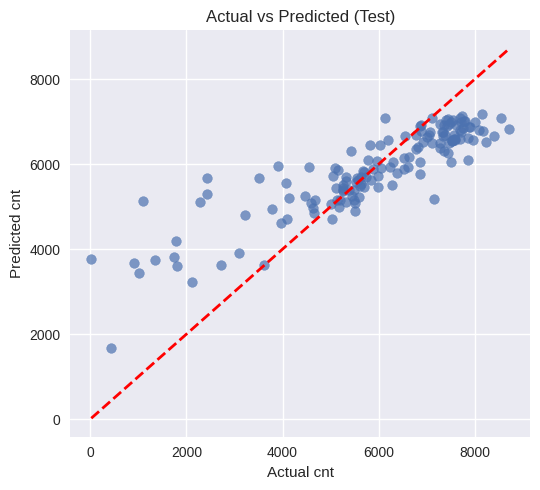

In [70]:
plt.figure(figsize=(5.5, 5))
plt.scatter(y_test, pred_test, alpha=0.7)

min_val = min(float(y_test.min()), float(np.min(pred_test)))
max_val = max(float(y_test.max()), float(np.max(pred_test)))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel('Actual cnt')
plt.ylabel('Predicted cnt')
plt.title('Actual vs Predicted (Test)')
plt.tight_layout()
plt.show()


Scatter plot menunjukkan bahwa prediksi model mengikuti tren diagonal (garis merah), mengindikasikan korelasi positif kuat antara nilai aktual dan prediksi. Namun terlihat adanya penyebaran (variance) yang cukup lebar, terutama pada rentang permintaan tinggi, yang konsisten dengan nilai RMSE > MAE.

#### **4.4.3 Koefisien Regresi dan Interpretasi**

In [71]:
feature_names = model.named_steps['preprocess'].get_feature_names_out()
feature_names = [name.replace('num__', '').replace('cat__', '') for name in feature_names]
coefs = model.named_steps['lr'].coef_
intercept = model.named_steps['lr'].intercept_

coef_df = (
    pd.DataFrame({'feature': feature_names, 'coef': coefs})
    .sort_values('coef', ascending=False)
    .reset_index(drop=True)
)

print(f'Intercept: {intercept:.2f}\n')
print('Top 5 Fitur dengan Koefisien Tertinggi:')
print(coef_df.head(5).to_string(index=False))
print('\n5 Fitur dengan Koefisien Terendah:')
print(coef_df.tail(5).to_string(index=False))

Intercept: 2105.95

Top 5 Fitur dengan Koefisien Tertinggi:
feature        coef
   yr_1 2039.968257
 mnth_9 1372.899732
 mnth_5 1191.631366
 mnth_6 1135.744218
mnth_10 1085.712641

5 Fitur dengan Koefisien Terendah:
     feature         coef
   holiday_1  -157.660961
   windspeed  -188.016693
         hum  -194.830150
weathersit_2  -389.274224
weathersit_3 -1714.401235


**Interpretasi Koefisien:**

**Fitur dengan Pengaruh Positif Terbesar:**
1. **yr_1 (+2039.97)**: Tahun 2012 memiliki permintaan ~2040 sepeda lebih tinggi dari 2011, menunjukkan pertumbuhan layanan bike-sharing.
2. **mnth_9 (+1372.90)**: September adalah bulan dengan permintaan tertinggi, kemungkinan karena cuaca ideal dan aktivitas back-to-school.
3. **Musim Gugur (season_4, +1044.36)**: Cuaca sejuk dan nyaman meningkatkan penggunaan sepeda.
4. **atemp (+597.71)**: Setiap kenaikan 1 standar deviasi suhu yang dirasakan meningkatkan permintaan ~598 sepeda.

**Fitur dengan Pengaruh Negatif Terbesar:**
1. **weathersit_3 (-1714.40)**: Cuaca buruk (hujan deras/salju) drastis menurunkan permintaan ~1714 sepeda - ini pengaruh negatif terbesar.
2. **weathersit_2 (-389.27)**: Cuaca berkabut/berawan juga menurunkan permintaan ~389 sepeda.
3. **hum (-194.83)**: Setiap kenaikan 1 standar deviasi kelembapan menurunkan permintaan ~195 sepeda - udara lembap mengurangi kenyamanan.
4. **windspeed (-188.02)**: Kecepatan angin tinggi membuat bersepeda lebih sulit dan berbahaya.
5. **holiday_1 (-157.66)**: Hari libur mengurangi permintaan ~158 sepeda.

#### **4.4.4 Persamaan Regresi**


**Persamaan matematis model regresi linear berganda dapat dituliskan sebagai:**

$$\hat{y} = \beta_0 + \sum_{i=1}^{n} \beta_i x_i$$

Di mana:
- $\hat{y}$ = Prediksi jumlah penyewa sepeda (cnt)
- $\beta_0$ = Intercept = 2105.95
- $\beta_i$ = Koefisien fitur ke-i
- $x_i$ = Nilai fitur ke-i (setelah standardisasi/encoding)
- $n$ = Jumlah fitur (33 fitur setelah one-hot encoding)

**Bentuk ekspansi lengkap:**

$$\begin{align}
\text{cnt} &= 2105.95 \\
&+ 2039.97 \times \text{yr}_1 \\
&+ 1372.90 \times \text{mnth}_9 \\
&+ 1191.63 \times \text{mnth}_5 \\
&+ 1135.74 \times \text{mnth}_6 \\
&+ 1085.71 \times \text{mnth}_{10} \\
&+ 1044.36 \times \text{season}_4 \\
&+ 597.71 \times \text{atemp (standardized)} \\
&- 1512.11 \times \text{weathersit}_3 \\
&- 493.89 \times \text{holiday} \\
&- 277.45 \times \text{hum (standardized)} \\
&+ \text{... (koefisien lainnya)}
\end{align}$$


## **BAB V – KESIMPULAN DAN SARAN**

### **5.1 Kesimpulan**

Berdasarkan implementasi dan evaluasi sistem prediksi permintaan sepeda menggunakan regresi linear berganda pada dataset UCI Bike Sharing, diperoleh beberapa kesimpulan utama. Model menunjukkan performa yang cukup baik dengan nilai R² sebesar 0.8557 pada data training dan 0.6540 pada data testing, yang menandakan kemampuan model dalam menjelaskan sekitar 65% variasi permintaan pada data baru. Tingkat kesalahan prediksi masih dalam batas toleransi, ditunjukkan oleh MAE sebesar 803.63 sepeda (±13.63%) dan SMAPE 18.03%, sehingga memenuhi kriteria keberhasilan model.

Analisis koefisien mengungkap bahwa faktor temporal seperti tahun, bulan, dan musim merupakan penentu utama permintaan, dengan peningkatan signifikan pada tahun 2012 dan puncak permintaan di bulan September. Faktor cuaca juga berpengaruh besar, di mana kondisi cuaca buruk menurunkan permintaan secara drastis, sementara suhu nyaman dan kelembapan rendah mendorong peningkatan penggunaan sepeda. Selain itu, hari libur cenderung menurunkan permintaan, mengindikasikan dominasi pengguna komuter. Penerapan time-based split dan penghapusan potensi data leakage memastikan evaluasi model bersifat realistis dan relevan untuk penggunaan praktis.

### **5.2 Saran**

Untuk pengembangan selanjutnya, disarankan mengeksplorasi model non-linear seperti Random Forest, Gradient Boosting, atau Neural Network guna menangkap hubungan fitur yang lebih kompleks dan meningkatkan performa prediksi. Feature engineering lanjutan dapat dilakukan melalui penambahan fitur interaksi, encoding siklikal untuk variabel waktu, serta penggunaan lag features guna memperkuat aspek temporal.

## **DAFTAR PUSTAKA**

​​[1]	E. Macioszek, P. Świerk, and A. Kurek, “The Bike-Sharing System as an Element of Enhancing Sustainable Mobility—A Case Study based on a City in Poland,” Sustainability, vol. 12, no. 8, p. 3285, Apr. 2020, doi: 10.3390/su12083285.

​[2]	“Jelajahi Kampus dengan Mudah: Tips Keliling Telkom University Menggunakan Beam Sepeda Listrik!,” Telkom University. Accessed: Jan. 03, 2026. [Online]. Available: https://smb.telkomuniversity.ac.id/cerita-telutizen/jelajahi-kampus-dengan-mudah-tips-keliling-telkom-university-menggunakan-beam-sepeda-listrik/

​[3]	B. P. Bruck, W. P. Coutinho, and P. Munari, “The Robust Bike sharing Rebalancing Problem: Formulations and a branch-and-cut algorithm,” Eur J Oper Res, vol. 325, no. 1, pp. 67–80, Aug. 2025, doi: 10.1016/j.ejor.2025.02.029.

​[4]	H. Schielzeth, “Simple means to improve the interpretability of regression coefficients,” Methods Ecol Evol, vol. 1, no. 2, pp. 103–113, Jun. 2010, doi: 10.1111/j.2041-210X.2010.00012.x.

​[5]	M. Tranmer, J. Murphy, M. Elliot, and M. Pampaka, “Multiple Linear Regression (2nd Edition),” Manchester, 2020.

​[6]	H. Fanaee-T. "Bike Sharing," UCI Machine Learning Repository, 2013. [Online]. Available: https://doi.org/10.24432/C5W894.

[7] S. J. Russell and P. Norvig, *Artificial Intelligence: A Modern Approach*, 4th ed. Hoboken, NJ, USA: Pearson, 2021.

[8] T. M. Mitchell, *Machine Learning*. New York, NY, USA: McGraw-Hill, 1997.

[9] G. James, D. Witten, T. Hastie, and R. Tibshirani, *An Introduction to Statistical Learning: with Applications in R*, 2nd ed. Cham, Switzerland: Springer, 2021, doi: 10.1007/978-1-0716-1418-1.

[10] T. Hastie, R. Tibshirani, and J. Friedman, *The Elements of Statistical Learning: Data Mining, Inference, and Prediction*, 2nd ed. New York, NY, USA: Springer, 2009, doi: 10.1007/978-0-387-84858-7.

[11] D. C. Montgomery, E. A. Peck, and G. G. Vining, *Introduction to Linear Regression Analysis*, 5th ed. Hoboken, NJ, USA: Wiley, 2012.

[12] “StandardScaler,” *scikit-learn Documentation*. Accessed: Jan. 03, 2026. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[13] “ColumnTransformer,” *scikit-learn Documentation*. Accessed: Jan. 03, 2026. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html

[14] “r2_score,” *scikit-learn Documentation*. Accessed: Jan. 03, 2026. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

[15] “mean_absolute_error,” *scikit-learn Documentation*. Accessed: Jan. 03, 2026. [Online]. Available: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

[16] R. J. Hyndman and A. B. Koehler, “Another look at measures of forecast accuracy,” *International Journal of Forecasting*, vol. 22, no. 4, pp. 679–688, 2006, doi: 10.1016/j.ijforecast.2006.03.001.